## Milestone 01

<h5>Abdullah Mahmoud Khodary</h5>
<h5>Ziad Amr</h5>
<h5>Mohamed Hassan</h5>
<h5>Mohamed Younis</h5>

<a id='LoadingData'></a>
### **Loading Data**

In [1533]:
# EDA Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


import plotly.express as px
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import plotly.subplots as sp
import plotly.graph_objects as go

sns.set_style("whitegrid")

In [1534]:
df = pd.read_csv('/Users/abdallahkhodary/Desktop/DCGUC-main/Data Engineering/DE Project/Uncleaned_DS_jobs.csv')

<a id='EDA'></a>
### EDA

In [1536]:
df.nunique()

index                672
Job Title            172
Salary Estimate       30
Job Description      489
Rating                32
Company Name         432
Location             207
Headquarters         229
Size                   9
Founded              103
Type of ownership     13
Industry              58
Sector                23
Revenue               14
Competitors          108
dtype: int64

In [1537]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              672 non-null    int64  
 1   Job Title          672 non-null    object 
 2   Salary Estimate    672 non-null    object 
 3   Job Description    672 non-null    object 
 4   Rating             672 non-null    float64
 5   Company Name       672 non-null    object 
 6   Location           672 non-null    object 
 7   Headquarters       672 non-null    object 
 8   Size               672 non-null    object 
 9   Founded            672 non-null    int64  
 10  Type of ownership  672 non-null    object 
 11  Industry           672 non-null    object 
 12  Sector             672 non-null    object 
 13  Revenue            672 non-null    object 
 14  Competitors        672 non-null    object 
dtypes: float64(1), int64(2), object(12)
memory usage: 78.9+ KB


In [1538]:
# Print Nan,-1 and Unknown value counts
df.isnull().sum() + (df == -1).sum() + (df == '-1').sum() + (df == 'Unknown').sum() + df.isna().sum()

index                  0
Job Title              0
Salary Estimate        0
Job Description        0
Rating                50
Company Name           0
Location               0
Headquarters          31
Size                  44
Founded              118
Type of ownership     31
Industry              71
Sector                71
Revenue               27
Competitors          501
dtype: int64

#### Univariate Analysis

##### Exploration: Categorical Features

In [1539]:
# Descriptive analysis for categorical data
df.describe(include='O')

,Job Title,Salary Estimate,Job Description,Company Name,Location,Headquarters,Size,Type of ownership,Industry,Sector,Revenue,Competitors
count,672,672,672,672,672,672,672,672,672,672,672,672
unique,172,30,489,432,207,229,9,13,58,23,14,108
top,Data Scientist,$79K-$131K (Glassdoor est.),Job Overview: The Data Scientist is a key memb...,Hatch Data Inc,"San Francisco, CA","New York, NY",51 to 200 employees,Company - Private,-1,Information Technology,Unknown / Non-Applicable,-1
freq,337,32,12,12,69,33,135,397,71,188,213,501


`What is the distribution of company ownership?`

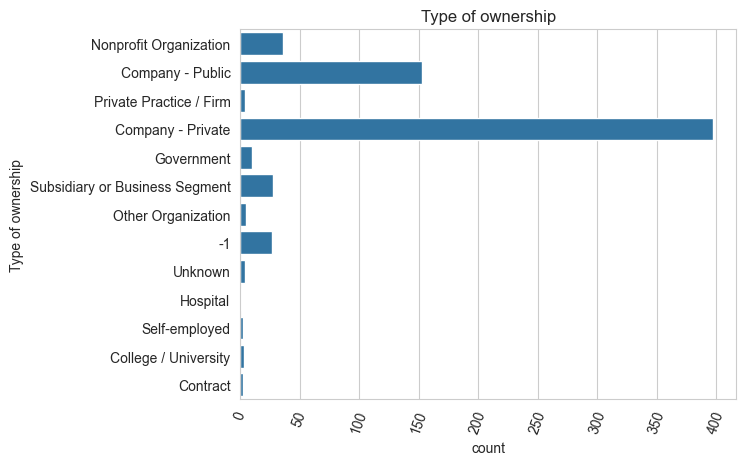

In [1540]:
# Distribution of Company ownership
sns.countplot(data = df,y='Type of ownership')
plt.title('Type of ownership')
plt.xticks(rotation = 70, )
plt.show()

`What is the distribution of Company size?`

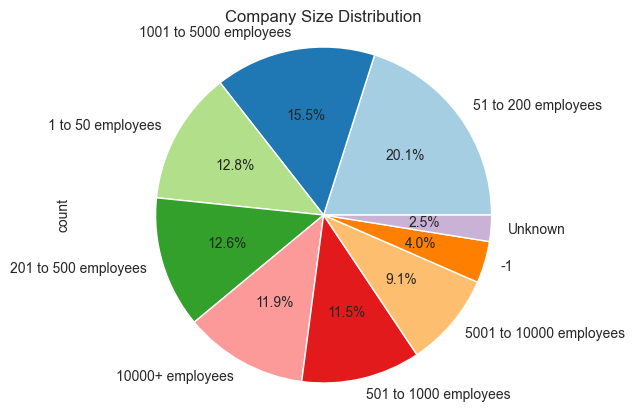

In [1541]:
# Distribution of Company size
df['Size'].value_counts().plot.pie(autopct='%1.1f%%', colors=plt.cm.Paired.colors)
plt.title('Company Size Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.
plt.show()

` What is the distribution of salaries?`

/var/folders/85/j274xyzd0q9b5hvl7hj559fc0000gn/T/ipykernel_16295/1770770264.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='Salary Estimate', palette='husl')


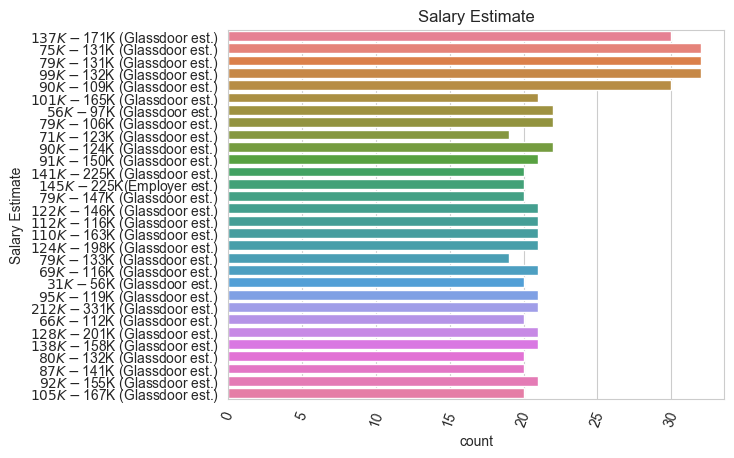

In [1542]:
# Distribution of Salaries
sns.countplot(data=df, y='Salary Estimate', palette='husl')
plt.title('Salary Estimate')
plt.xticks(rotation=70)
plt.show()

`What is distribution of sectors?`

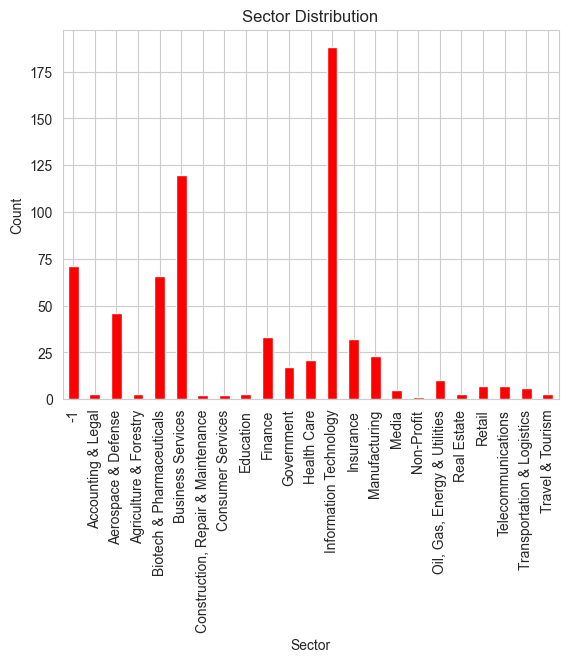

In [1543]:
df['Sector'].value_counts().sort_index().plot(kind='bar', color='red')
plt.title('Sector Distribution')
plt.xlabel('Sector')
plt.ylabel('Count')
plt.show()

`What is the distribution of revenue?`

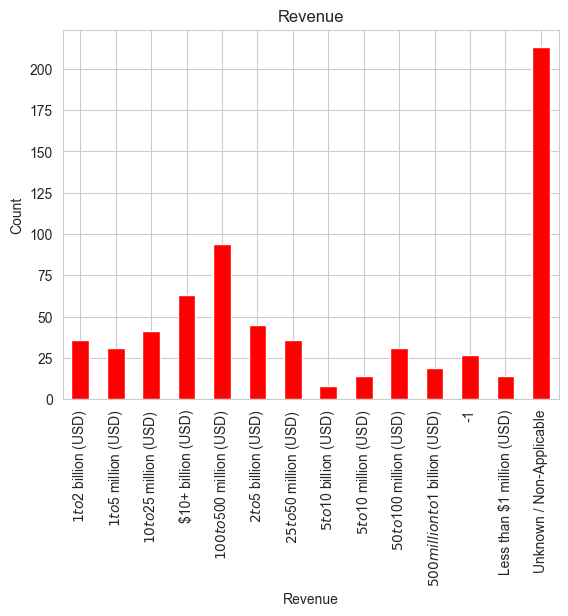

In [1544]:

df['Revenue'].value_counts().sort_index().plot(kind='bar', color='red')
plt.title('Revenue')
plt.xlabel('Revenue')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.show()


`What industries are most common?`

/var/folders/85/j274xyzd0q9b5hvl7hj559fc0000gn/T/ipykernel_16295/3803092078.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Industry', data=df, order=df['Industry'].value_counts().index, palette='pastel')


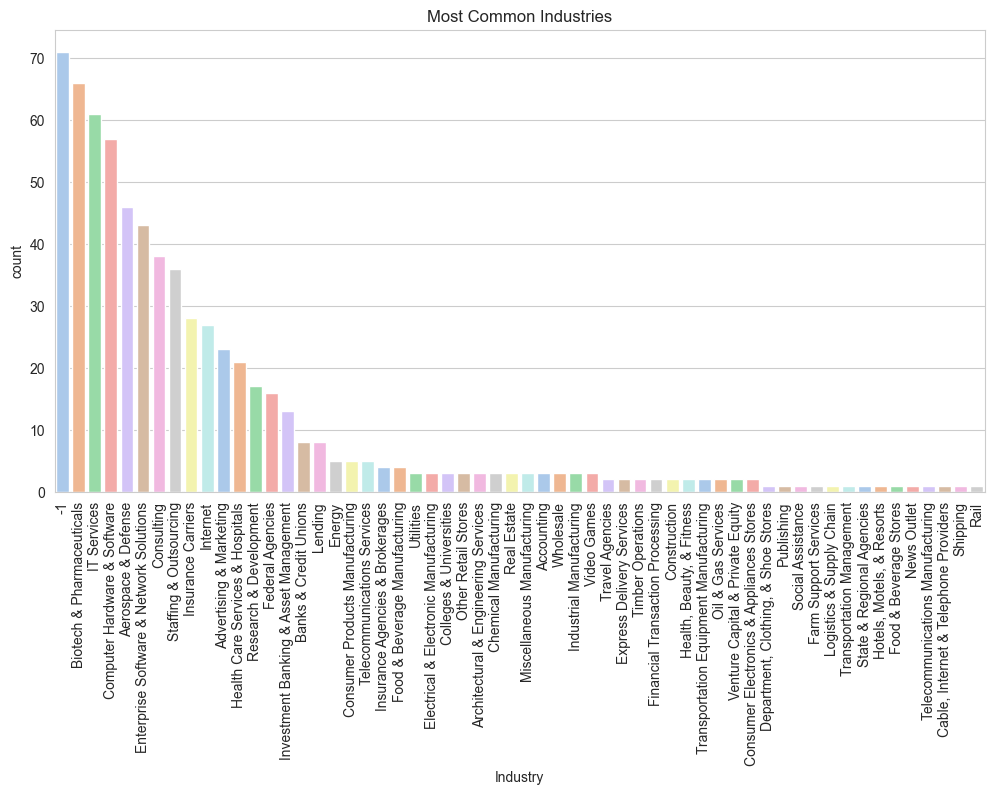

In [1545]:
#Most Common Industries
plt.figure(figsize=(12, 6))
sns.countplot(x='Industry', data=df, order=df['Industry'].value_counts().index, palette='pastel')
plt.title('Most Common Industries')
plt.xticks(rotation=90)
plt.show()

##### Numerical Features

In [1546]:
df.describe().style.background_gradient()

,index,Rating,Founded
count,672.000000,672.000000,672.000000
mean,335.500000,3.518601,1635.529762
std,194.133974,1.410329,756.746640
min,0.000000,-1.000000,-1.000000
25%,167.750000,3.300000,1917.750000
50%,335.500000,3.800000,1995.000000
75%,503.250000,4.300000,2009.000000
max,671.000000,5.000000,2019.000000


<Axes: xlabel='Rating'>

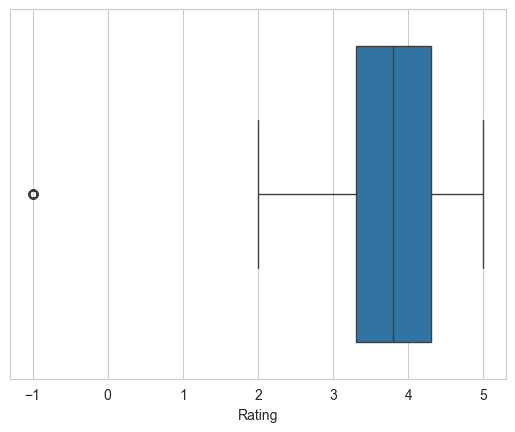

In [1547]:
sns.boxplot(x=df['Rating'])

`What is the distribution of ratings for the companies`

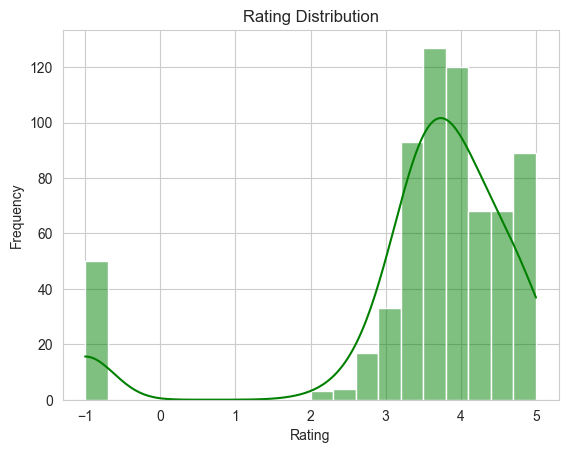

In [1548]:
 #1. Distribution of Ratings for Companies
sns.histplot(df['Rating'], bins=20, kde=True, color='green')
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

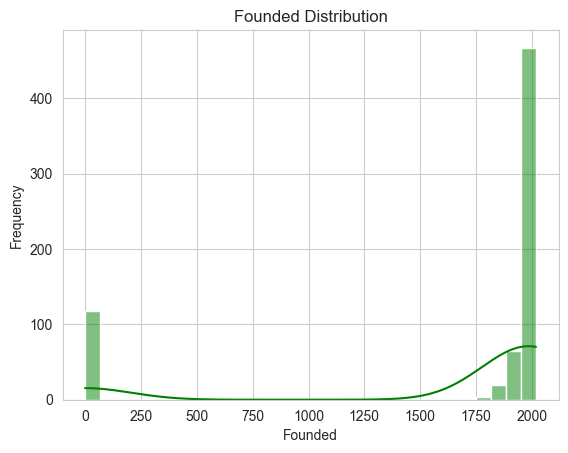

In [1549]:
sns.histplot(df['Founded'], bins = 30, kde=True, color='green')
plt.title('Founded Distribution')
plt.xlabel('Founded')
plt.ylabel('Frequency')
plt.show()

In [1550]:
df['Founded'].unique()

array([1993, 1968, 1981, 2000, 1998, 2010, 1996, 1990, 1983, 2014, 2012,
       2016, 1965, 1973, 1986, 1997, 2015, 1945, 1988, 2017, 2011, 1967,
       1860, 1992, 2003, 1951, 2005, 2019, 1925, 2008, 1999, 1978, 1966,
       1912, 1958, 2013, 1849, 1781, 1926, 2006, 1994, 1863, 1995,   -1,
       1982, 1974, 2001, 1985, 1913, 1971, 1911, 2009, 1959, 2007, 1939,
       2002, 1961, 1963, 1969, 1946, 1957, 1953, 1948, 1850, 1851, 2004,
       1976, 1918, 1954, 1947, 1955, 2018, 1937, 1917, 1935, 1929, 1820,
       1952, 1932, 1894, 1960, 1788, 1830, 1984, 1933, 1880, 1887, 1970,
       1942, 1980, 1989, 1908, 1853, 1875, 1914, 1898, 1956, 1977, 1987,
       1896, 1972, 1949, 1962])

#### Bivariate Analysis

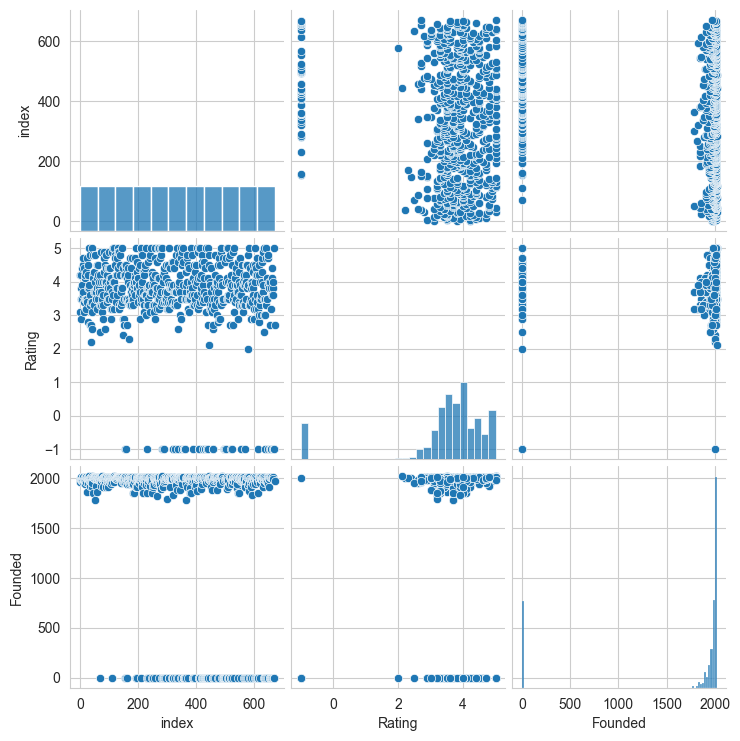

In [1551]:
sns.pairplot(df)

### Questions

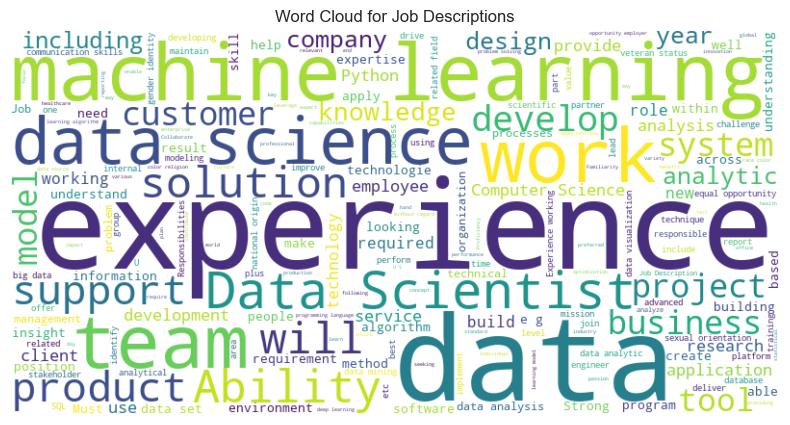

In [1552]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming 'job_desc' is a concatenation of all job descriptions
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['Job Description']))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Job Descriptions')
plt.show()

<a id='Data-Cleaning'></a>
### Data Cleaning

- Drop `Index`

In [1554]:
# Drop index column id number
df.drop(columns='index' , inplace=True)

- Drop `Competitors`
    - Given the abundance of invalid values represented by -1 in the Competitors column,we have decided to simply remove them

In [1556]:
df.drop(columns='Competitors' , inplace=True)

#### Handling Missing Values

> 

##### Clean `Rating`
    - MCAR : `Rating` is random and not related to any other variables in our dataset


- Replace all -1 , Unknown values with 0

In [1558]:

df['Rating'].replace(-1,0 , inplace=True)

##### Clean `Headquarter` , `Size` , `Founded` , `Type of Ownership` , `Industry` , `Sector` , `Revenue`

    - Depends on another variable and this relationship is explained by the values of those variables, it could be considered MAR.

In [1561]:
df.replace(-1,np.nan,inplace=True)
df.replace('-1',np.nan,inplace=True)
df.replace('Unknown',np.nan,inplace=True)

##### Tidy up the column names

In [1563]:
df.rename(columns={'Job Title': 'Job Title', 'Salary Estimate': 'Salary Estimate', 
                   'Job Description': 'Job Description', 'Company Name': 'Company Name',
                   'Type of ownership': 'Ownership'}, inplace=True)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Ownership,Industry,Sector,Revenue
0,Sr Data Scientist,$137K-$171K (Glassdoor est.),Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst\n3.1,"New York, NY","New York, NY",1001 to 5000 employees,1993.0,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable
1,Data Scientist,$137K-$171K (Glassdoor est.),"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech\n4.2,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968.0,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD)
2,Data Scientist,$137K-$171K (Glassdoor est.),Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group\n3.8,"Boston, MA","Boston, MA",1001 to 5000 employees,1981.0,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD)
3,Data Scientist,$137K-$171K (Glassdoor est.),JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON\n3.5,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000.0,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD)
4,Data Scientist,$137K-$171K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998.0,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable


##### Drop Duplicates

In [1564]:
df[df.duplicated()]

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Ownership,Industry,Sector,Revenue
135,Machine Learning Engineer,$90K-$109K (Glassdoor est.),Role Description\nTriplebyte screens and evalu...,3.2,Triplebyte\n3.2,Remote,"San Francisco, CA",51 to 200 employees,2015.0,Company - Private,Computer Hardware & Software,Information Technology,Unknown / Non-Applicable
136,Senior Data Engineer,$90K-$109K (Glassdoor est.),Lendio is looking to fill a position for a Sen...,4.9,Lendio\n4.9,"Lehi, UT","Lehi, UT",201 to 500 employees,2011.0,Company - Private,Lending,Finance,$50 to $100 million (USD)
358,Data Scientist,$122K-$146K (Glassdoor est.),Job Overview: The Data Scientist is a key memb...,0.0,Hatch Data Inc,"San Francisco, CA",NaN,NaN,NaN,NaN,NaN,NaN,NaN
359,Data Scientist,$122K-$146K (Glassdoor est.),Job Overview: The Data Scientist is a key memb...,0.0,Hatch Data Inc,"San Francisco, CA",NaN,NaN,NaN,NaN,NaN,NaN,NaN
360,Data Scientist,$122K-$146K (Glassdoor est.),Job Overview: The Data Scientist is a key memb...,0.0,Hatch Data Inc,"San Francisco, CA",NaN,NaN,NaN,NaN,NaN,NaN,NaN
361,Data Scientist,$122K-$146K (Glassdoor est.),Job Overview: The Data Scientist is a key memb...,0.0,Hatch Data Inc,"San Francisco, CA",NaN,NaN,NaN,NaN,NaN,NaN,NaN
362,Data Scientist,$122K-$146K (Glassdoor est.),Job Overview: The Data Scientist is a key memb...,0.0,Hatch Data Inc,"San Francisco, CA",NaN,NaN,NaN,NaN,NaN,NaN,NaN
389,Data Scientist,$110K-$163K (Glassdoor est.),"Job Description\nAs a Data Scientist, you will...",0.0,HireAi,"San Francisco, CA",NaN,NaN,NaN,NaN,NaN,NaN,NaN
496,Data Scientist,$95K-$119K (Glassdoor est.),Job Overview: The Data Scientist is a key memb...,0.0,Hatch Data Inc,"San Francisco, CA",NaN,NaN,NaN,NaN,NaN,NaN,NaN
497,Data Scientist,$95K-$119K (Glassdoor est.),Job Overview: The Data Scientist is a key memb...,0.0,Hatch Data Inc,"San Francisco, CA",NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1567]:
df.drop_duplicates(inplace=True , keep='first')

##### Handling outliers

##### **Univariate Outliers**

###### IQR method

In [1581]:
df = new_df

`Founded` Column

> IQR method

In [1582]:
df['Founded'].mean()

1984.0

> convert nan values with the mean value ,the type of missing values is MAR 

In [1583]:
df['Founded'].replace(np.nan , df['Founded'].mean(),inplace=True)

In [1584]:
df['Founded'] = df['Founded'].astype('int')

### Data Transformation & Feature Engineering

#### Feature Engineering

##### `Salary Estimate` 

In [1595]:
# Cleaning for Salary Estimate Column
df['Salary Estimate'] = df['Salary Estimate'].str.replace('K', '')
df['Salary Estimate'] = df['Salary Estimate'].str.replace('$', '')
df['Salary Estimate'] = df['Salary Estimate'].str.replace('-', '-')
df['Salary Estimate'] = df['Salary Estimate'].apply(lambda x: x.split('(')[0])


,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Ownership,Industry,Sector,Revenue
0,Sr Data Scientist,137-171,Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst\n3.1,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable
1,Data Scientist,137-171,"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech\n4.2,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD)
2,Data Scientist,137-171,Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group\n3.8,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD)
3,Data Scientist,137-171,JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON\n3.5,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD)
4,Data Scientist,137-171,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable


In [1596]:
df['Minimum Salary'] = df['Salary Estimate'].apply(lambda x: int(x.split('-')[0]))
df['Maximum Salary'] = df['Salary Estimate'].apply(lambda x: int(x.split('-')[1]))
df['Average Salary'] = (df['Maximum Salary']+df['Minimum Salary'])//2


,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Ownership,Industry,Sector,Revenue,Minimum Salary,Maximum Salary,Average Salary
0,Sr Data Scientist,137-171,Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst\n3.1,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,137,171,154
1,Data Scientist,137-171,"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech\n4.2,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),137,171,154
2,Data Scientist,137-171,Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group\n3.8,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),137,171,154
3,Data Scientist,137-171,JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON\n3.5,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD),137,171,154
4,Data Scientist,137-171,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,137,171,154


In [1597]:

bins = [0, 100, 125, 175, float('inf')]
labels = ['Very Low', 'Low', 'Medium', 'High']

df['salary_category'] = pd.cut(df['Average Salary'], bins=bins, labels=labels, right=False)

df.head(10)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Ownership,Industry,Sector,Revenue,Minimum Salary,Maximum Salary,Average Salary,salary_category
0,Sr Data Scientist,137-171,Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst\n3.1,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,137,171,154,Medium
1,Data Scientist,137-171,"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech\n4.2,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),137,171,154,Medium
2,Data Scientist,137-171,Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group\n3.8,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),137,171,154,Medium
3,Data Scientist,137-171,JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON\n3.5,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD),137,171,154,Medium
4,Data Scientist,137-171,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,137,171,154,Medium
5,Data Scientist,137-171,About Us:\n\nHeadquartered in beautiful Santa ...,4.2,HG Insights\n4.2,"Santa Barbara, CA","Santa Barbara, CA",51 to 200 employees,2010,Company - Private,Computer Hardware & Software,Information Technology,Unknown / Non-Applicable,137,171,154,Medium
6,Data Scientist / Machine Learning Expert,137-171,Posting Title\nData Scientist / Machine Learni...,3.9,Novartis\n3.9,"Cambridge, MA","Basel, Switzerland",10000+ employees,1996,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$10+ billion (USD),137,171,154,Medium
7,Data Scientist,137-171,Introduction\n\nHave you always wanted to run ...,3.5,iRobot\n3.5,"Bedford, MA","Bedford, MA",1001 to 5000 employees,1990,Company - Public,Consumer Electronics & Appliances Stores,Retail,$1 to $2 billion (USD),137,171,154,Medium
8,Staff Data Scientist - Analytics,137-171,Intuit is seeking a Staff Data Scientist to co...,4.4,Intuit - Data\n4.4,"San Diego, CA","Mountain View, CA",5001 to 10000 employees,1983,Company - Public,Computer Hardware & Software,Information Technology,$2 to $5 billion (USD),137,171,154,Medium
9,Data Scientist,137-171,Ready to write the best chapter of your career...,3.6,XSELL Technologies\n3.6,"Chicago, IL","Chicago, IL",51 to 200 employees,2014,Company - Private,Enterprise Software & Network Solutions,Information Technology,Unknown / Non-Applicable,137,171,154,Medium


##### `Rating`

In [1598]:
df['Rating'].unique()

array([3.1 , 4.2 , 3.8 , 3.5 , 2.9 , 3.9 , 4.4 , 3.6 , 4.5 , 4.7 , 3.7 ,
       3.4 , 4.1 , 3.2 , 4.3 , 2.8 , 5.  , 4.8 , 3.3 , 2.7 , 2.2 , 2.6 ,
       4.  , 2.5 , 4.9 , 2.4 , 2.05, 2.3 , 4.6 , 3.  , 2.1 ])

In [1599]:

bins = [0, 1, 2, 3, 4, 5, np.inf]
labels = ['0-1', '1-2', '2-3', '3-4', '4-5', 'NaN']
df['Rating Interval'] = pd.cut(df['Rating'], bins=bins, labels=labels, include_lowest=True)

In [1600]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Ownership,Industry,Sector,Revenue,Minimum Salary,Maximum Salary,Average Salary,salary_category,Rating Interval
0,Sr Data Scientist,137-171,Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst\n3.1,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,137,171,154,Medium,3-4
1,Data Scientist,137-171,"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech\n4.2,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),137,171,154,Medium,4-5
2,Data Scientist,137-171,Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group\n3.8,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),137,171,154,Medium,3-4
3,Data Scientist,137-171,JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON\n3.5,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD),137,171,154,Medium,3-4
4,Data Scientist,137-171,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,137,171,154,Medium,2-3


#### `Size`

In [1601]:
df['Size'] = df['Size'].str.replace('to', '-')
df['Size'] = df['Size'].str.replace('employees', '')
df['Size'] = df['Size'].str.replace('employees', '')

In [1602]:
df['Size'] = df['Size'].replace(np.nan , 'Unknown')

In [1603]:
df['Size'].unique()

array(['1001 - 5000 ', '5001 - 10000 ', '501 - 1000 ', '51 - 200 ',
       '10000+ ', '201 - 500 ', '1 - 50 ', 'Unknown'], dtype=object)

In [1604]:
df['Min Employees']=df['Size'].apply(lambda x:x.split('-')[0])

df['Max Employees']=df['Size'].apply(lambda x:x.split('-')[-1])

In [1605]:
df['Min Employees'] = df['Min Employees'].str.replace('10000+', '10001')
df['Min Employees'].value_counts()

Min Employees
51         134
1001       104
1           86
201         84
10001       80
501         77
5001        61
Unknown     33
Name: count, dtype: int64

#### `Ownership`

In [1606]:
public_ownership = ['Government','Company - Public']
private_ownership = ['Subsidiary or Business Segment', 'Private Practice / Firm','Company - Private']
non_profit = ['College / University', 'Hospital','Nonprofit Organization']
other_ownership = ['Self-employed', 'Contract','Other Organization']

for index, row in df.iterrows():
    ownership = row['Ownership']
    if ownership == '-1':
        df.loc[index, 'Ownership'] = 'Unknown'
    elif ownership in public_ownership:
        df.loc[index, 'Ownership'] = 'Public'
    elif ownership in private_ownership:
        df.loc[index, 'Ownership'] = 'Private'
    elif ownership in non_profit:
        df.loc[index, 'Ownership'] = 'Nonprofit'
    elif ownership in other_ownership:
        df.loc[index, 'Ownership'] = 'Other'
        
df['Ownership'].value_counts()

Ownership
Private      427
Public       163
Nonprofit     40
Other          9
Name: count, dtype: int64

#### One-Hot Encoding `Ownership`

In [1607]:
from sklearn.preprocessing import OneHotEncoder

# Copy the original data
encoded_df = df.copy()

# One-hot encode the "Ownership" column
new_categorical_subset = pd.get_dummies(encoded_df['Ownership'], prefix='Ownership')

# Drop the original "Ownership" column
encoded_df = encoded_df.drop(columns='Ownership')

# Join the two dataframes using concat
# Make sure to use axis=1 to perform a column bind
encoded_df = pd.concat([encoded_df, new_categorical_subset], axis=1)

# Display the resulting DataFrame
encoded_df

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Industry,...,Maximum Salary,Average Salary,salary_category,Rating Interval,Min Employees,Max Employees,Ownership_Nonprofit,Ownership_Other,Ownership_Private,Ownership_Public
0,Sr Data Scientist,137-171,Description\n\nThe Senior Data Scientist is re...,3.10,Healthfirst\n3.1,"New York, NY","New York, NY",1001 - 5000,1993,Insurance Carriers,...,171,154,Medium,3-4,1001,5000,True,False,False,False
1,Data Scientist,137-171,"Secure our Nation, Ignite your Future\n\nJoin ...",4.20,ManTech\n4.2,"Chantilly, VA","Herndon, VA",5001 - 10000,1968,Research & Development,...,171,154,Medium,4-5,5001,10000,False,False,False,True
2,Data Scientist,137-171,Overview\n\n\nAnalysis Group is one of the lar...,3.80,Analysis Group\n3.8,"Boston, MA","Boston, MA",1001 - 5000,1981,Consulting,...,171,154,Medium,3-4,1001,5000,False,False,True,False
3,Data Scientist,137-171,JOB DESCRIPTION:\n\nDo you have a passion for ...,3.50,INFICON\n3.5,"Newton, MA","Bad Ragaz, Switzerland",501 - 1000,2000,Electrical & Electronic Manufacturing,...,171,154,Medium,3-4,501,1000,False,False,False,True
4,Data Scientist,137-171,Data Scientist\nAffinity Solutions / Marketing...,2.90,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 - 200,1998,Advertising & Marketing,...,171,154,Medium,2-3,51,200,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,Data Scientist,105-167,Summary\n\nWe’re looking for a data scientist ...,3.60,TRANZACT\n3.6,"Fort Lee, NJ","Fort Lee, NJ",1001 - 5000,1989,Advertising & Marketing,...,167,136,Medium,3-4,1001,5000,False,False,True,False
668,Data Scientist,105-167,Job Description\nBecome a thought leader withi...,2.05,JKGT,"San Francisco, CA",NaN,Unknown,1984,NaN,...,167,136,Medium,2-3,Unknown,Unknown,False,False,False,False
669,Data Scientist,105-167,Join a thriving company that is changing the w...,2.05,AccessHope,"Irwindale, CA",NaN,Unknown,1984,NaN,...,167,136,Medium,2-3,Unknown,Unknown,False,False,False,False
670,Data Scientist,105-167,100 Remote Opportunity As an AINLP Data Scient...,5.00,ChaTeck Incorporated\n5.0,"San Francisco, CA","Santa Clara, CA",1 - 50,1984,Advertising & Marketing,...,167,136,Medium,4-5,1,50,False,False,True,False


#### Data Extraction `Job Description`

**Extracting Educational level needed from Job Description**

In [1608]:
import re


education_pattern = r'(bachelor|master|phd|doctorate|msc|bcs|Bachelor\s|masters|Advanced degree|ph.d|master\s|mba)'

# Create a new column called 'education_level' and initialize it with NaN values
df['Education Level'] = float('nan')

# Loop through each row in the DataFrame and extract education level using the regular expression
for index, row in df.iterrows():
    description = str(row['Job Description'])
    
    # Search for the pattern in the description
    match = re.search(education_pattern, description, flags=re.IGNORECASE)
    
    if match:
        # Extract the education level from the matched pattern
        education_level = match.group(1)
        df.at[index, 'Education Level'] = education_level.capitalize()

# Display the updated DataFrame
print(df[['Job Description', 'Education Level']])

/var/folders/85/j274xyzd0q9b5hvl7hj559fc0000gn/T/ipykernel_16295/802473219.py:19: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Bachelor' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.at[index, 'Education Level'] = education_level.capitalize()


                                       Job Description  Education Level
0    Description\n\nThe Senior Data Scientist is re...         Bachelor
1    Secure our Nation, Ignite your Future\n\nJoin ...         Bachelor
2    Overview\n\n\nAnalysis Group is one of the lar...              Phd
3    JOB DESCRIPTION:\n\nDo you have a passion for ...         Bachelor
4    Data Scientist\nAffinity Solutions / Marketing...  Advanced degree
..                                                 ...              ...
667  Summary\n\nWe’re looking for a data scientist ...              NaN
668  Job Description\nBecome a thought leader withi...              NaN
669  Join a thriving company that is changing the w...              NaN
670  100 Remote Opportunity As an AINLP Data Scient...         Bachelor
671  Description\n\nThe Data Scientist will be part...              NaN

[659 rows x 2 columns]


In [1609]:
df['Education Level'].isna().sum()

190

In [1610]:

df['Education Level'] = df['Education Level'].str.replace('ph d', 'Phd', case=False)
df['Education Level'] = df['Education Level'].str.replace('ph.d', 'Phd', case=False)
df['Education Level'] = df['Education Level'].str.replace('msc', 'Master', case=False)
df['Education Level'] = df['Education Level'].str.replace('mba', 'Master', case=False)
df['Education Level'] = df['Education Level'].str.replace('Doctorate', 'Phd', case=False)
# Display the updated DataFrame
print(df[['Education Level']])


     Education Level
0           Bachelor
1           Bachelor
2                Phd
3           Bachelor
4    Advanced degree
..               ...
667              NaN
668              NaN
669              NaN
670         Bachelor
671              NaN

[659 rows x 1 columns]


In [1611]:

df['Education Level'] = df['Education Level'].fillna("Not Mentioned")

# Display the updated DataFrame
print(df[['Education Level']])


     Education Level
0           Bachelor
1           Bachelor
2                Phd
3           Bachelor
4    Advanced degree
..               ...
667    Not Mentioned
668    Not Mentioned
669    Not Mentioned
670         Bachelor
671    Not Mentioned

[659 rows x 1 columns]


In [1612]:

df['Education Level'].value_counts()

Education Level
Bachelor           242
Not Mentioned      190
Phd                117
Master              88
Advanced degree     22
Name: count, dtype: int64

In [1613]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Ownership,...,Sector,Revenue,Minimum Salary,Maximum Salary,Average Salary,salary_category,Rating Interval,Min Employees,Max Employees,Education Level
0,Sr Data Scientist,137-171,Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst\n3.1,"New York, NY","New York, NY",1001 - 5000,1993,Nonprofit,...,Insurance,Unknown / Non-Applicable,137,171,154,Medium,3-4,1001,5000,Bachelor
1,Data Scientist,137-171,"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech\n4.2,"Chantilly, VA","Herndon, VA",5001 - 10000,1968,Public,...,Business Services,$1 to $2 billion (USD),137,171,154,Medium,4-5,5001,10000,Bachelor
2,Data Scientist,137-171,Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group\n3.8,"Boston, MA","Boston, MA",1001 - 5000,1981,Private,...,Business Services,$100 to $500 million (USD),137,171,154,Medium,3-4,1001,5000,Phd
3,Data Scientist,137-171,JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON\n3.5,"Newton, MA","Bad Ragaz, Switzerland",501 - 1000,2000,Public,...,Manufacturing,$100 to $500 million (USD),137,171,154,Medium,3-4,501,1000,Bachelor
4,Data Scientist,137-171,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 - 200,1998,Private,...,Business Services,Unknown / Non-Applicable,137,171,154,Medium,2-3,51,200,Advanced degree


**Extracting Experience level needed from Job Description**

In [1614]:
condition = ((df['Job Description'].str.contains('1+', case=False))|(df['Job Description'].str.contains("2+", case=False)) |(df['Job Description'].str.contains("at least 1", case=False))|(df['Job Description'].str.contains("at least one", case=False))|(df['Job Description'].str.contains("at least 2", case=False))|(df['Job Description'].str.contains("at least two", case=False)))
df.loc[condition, 'Experience Level'] = "Entry"

condition = ((df['Job Description'].str.contains('3+', case=False))|(df['Job Description'].str.contains('at least three', case=False))|(df['Job Description'].str.contains('three+', case=False)) |(df['Job Description'].str.contains("at least 4", case=False))|(df['Job Description'].str.contains('at least four', case=False)) |(df['Job Description'].str.contains('4+', case=False))|(df['Job Description'].str.contains('m.s ', case=False)) )
df.loc[condition, 'Experience Level'] = 'Mid-Senior'

condition = ((df['Job Description'].str.contains('lead', case=False))| (df['Job Description'].str.contains('senior', case=False)))
df.loc[condition, 'Experience Level'] = 'Senior'

df['Experience Level'].value_counts()

Experience Level
Senior        387
Mid-Senior    181
Entry          56
nan            35
Name: count, dtype: int64

In [1615]:
df['Experience Level'] = df['Experience Level'].replace('nan','Not Mentioned')


In [1616]:
df[df['Experience Level'] == 'nan']

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Ownership,...,Revenue,Minimum Salary,Maximum Salary,Average Salary,salary_category,Rating Interval,Min Employees,Max Employees,Education Level,Experience Level


In [1617]:
df['Experience Level'].value_counts()

Experience Level
Senior           387
Mid-Senior       181
Entry             56
Not Mentioned     35
Name: count, dtype: int64

**Extracting Skills needed from Job Description**

In [1618]:
df['python'] = df['Job Description'].apply(lambda x: 1 if 'python' in x.lower() else 0)
df['excel'] = df['Job Description'].apply(lambda x: 1 if 'excel' in x.lower() else 0)
df['hadoop'] = df['Job Description'].apply(lambda x: 1 if 'hadoop' in x.lower() else 0)
df['spark'] = df['Job Description'].apply(lambda x: 1 if 'spark' in x.lower() else 0)
df['aws'] = df['Job Description'].apply(lambda x: 1 if 'aws' in x.lower() else 0)
df['tableau'] = df['Job Description'].apply(lambda x: 1 if 'tableau' in x.lower() else 0)
df['big_data'] = df['Job Description'].apply(lambda x: 1 if 'big data' in x.lower() else 0)
df.head(20)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Ownership,...,Max Employees,Education Level,Experience Level,python,excel,hadoop,spark,aws,tableau,big_data
0,Sr Data Scientist,137-171,Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst\n3.1,"New York, NY","New York, NY",1001 - 5000,1993,Nonprofit,...,5000,Bachelor,Senior,0,0,0,0,1,0,0
1,Data Scientist,137-171,"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech\n4.2,"Chantilly, VA","Herndon, VA",5001 - 10000,1968,Public,...,10000,Bachelor,Mid-Senior,0,0,1,0,0,0,1
2,Data Scientist,137-171,Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group\n3.8,"Boston, MA","Boston, MA",1001 - 5000,1981,Private,...,5000,Phd,Senior,1,1,0,0,1,0,0
3,Data Scientist,137-171,JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON\n3.5,"Newton, MA","Bad Ragaz, Switzerland",501 - 1000,2000,Public,...,1000,Bachelor,Mid-Senior,1,1,0,0,1,0,0
4,Data Scientist,137-171,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 - 200,1998,Private,...,200,Advanced degree,Senior,1,1,0,0,0,0,0
5,Data Scientist,137-171,About Us:\n\nHeadquartered in beautiful Santa ...,4.2,HG Insights\n4.2,"Santa Barbara, CA","Santa Barbara, CA",51 - 200,2010,Private,...,200,Phd,Senior,1,1,1,1,0,0,0
6,Data Scientist / Machine Learning Expert,137-171,Posting Title\nData Scientist / Machine Learni...,3.9,Novartis\n3.9,"Cambridge, MA","Basel, Switzerland",10000+,1996,Public,...,10000+,Advanced degree,Senior,1,0,0,0,0,0,0
7,Data Scientist,137-171,Introduction\n\nHave you always wanted to run ...,3.5,iRobot\n3.5,"Bedford, MA","Bedford, MA",1001 - 5000,1990,Public,...,5000,Not Mentioned,Entry,1,0,0,0,0,0,0
8,Staff Data Scientist - Analytics,137-171,Intuit is seeking a Staff Data Scientist to co...,4.4,Intuit - Data\n4.4,"San Diego, CA","Mountain View, CA",5001 - 10000,1983,Public,...,10000,Not Mentioned,Mid-Senior,0,0,0,0,0,0,0
9,Data Scientist,137-171,Ready to write the best chapter of your career...,3.6,XSELL Technologies\n3.6,"Chicago, IL","Chicago, IL",51 - 200,2014,Private,...,200,Phd,Senior,1,0,0,0,0,0,0


`Company`

In [1619]:
df['Company Name'] = df['Company Name'].str.split('\n').str[0]

In [1620]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Ownership,...,Max Employees,Education Level,Experience Level,python,excel,hadoop,spark,aws,tableau,big_data
0,Sr Data Scientist,137-171,Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst,"New York, NY","New York, NY",1001 - 5000,1993,Nonprofit,...,5000,Bachelor,Senior,0,0,0,0,1,0,0
1,Data Scientist,137-171,"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech,"Chantilly, VA","Herndon, VA",5001 - 10000,1968,Public,...,10000,Bachelor,Mid-Senior,0,0,1,0,0,0,1
2,Data Scientist,137-171,Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group,"Boston, MA","Boston, MA",1001 - 5000,1981,Private,...,5000,Phd,Senior,1,1,0,0,1,0,0
3,Data Scientist,137-171,JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON,"Newton, MA","Bad Ragaz, Switzerland",501 - 1000,2000,Public,...,1000,Bachelor,Mid-Senior,1,1,0,0,1,0,0
4,Data Scientist,137-171,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 - 200,1998,Private,...,200,Advanced degree,Senior,1,1,0,0,0,0,0


In [1621]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 659 entries, 0 to 671
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Job Title         659 non-null    object  
 1   Salary Estimate   659 non-null    object  
 2   Job Description   659 non-null    object  
 3   Rating            659 non-null    float64 
 4   Company Name      659 non-null    object  
 5   Location          659 non-null    object  
 6   Headquarters      639 non-null    object  
 7   Size              659 non-null    object  
 8   Founded           659 non-null    int64   
 9   Ownership         639 non-null    object  
 10  Industry          599 non-null    object  
 11  Sector            599 non-null    object  
 12  Revenue           643 non-null    object  
 13  Minimum Salary    659 non-null    int64   
 14  Maximum Salary    659 non-null    int64   
 15  Average Salary    659 non-null    int64   
 16  salary_category   659 non-null 

In [1622]:
# create lists to identify the states and country name
US = ['United States', 'USA', 'united states', 'U.S.']
DC = ['Washington, D.C.', 'Washington, DC']

# Map of full state names to their abbreviations
state_name_to_abbreviation = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA',
    'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA',
    'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA',
    'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD',
    'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO',
    'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ',
    'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH',
    'Oklahoma': 'OK', 'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI',
    'South Carolina': 'SC', 'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT',
    'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA', 'West Virginia': 'WV', 'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

# create a list that contains both full name and abbreviations
states = list(state_name_to_abbreviation.keys())
state_abbrs = list(state_name_to_abbreviation.values())
states.extend(state_abbrs)

In [1623]:
df['State']=df['Location'].apply(lambda x:x.split(',')[-1])
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Ownership,...,Education Level,Experience Level,python,excel,hadoop,spark,aws,tableau,big_data,State
0,Sr Data Scientist,137-171,Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst,"New York, NY","New York, NY",1001 - 5000,1993,Nonprofit,...,Bachelor,Senior,0,0,0,0,1,0,0,NY
1,Data Scientist,137-171,"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech,"Chantilly, VA","Herndon, VA",5001 - 10000,1968,Public,...,Bachelor,Mid-Senior,0,0,1,0,0,0,1,VA
2,Data Scientist,137-171,Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group,"Boston, MA","Boston, MA",1001 - 5000,1981,Private,...,Phd,Senior,1,1,0,0,1,0,0,MA
3,Data Scientist,137-171,JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON,"Newton, MA","Bad Ragaz, Switzerland",501 - 1000,2000,Public,...,Bachelor,Mid-Senior,1,1,0,0,1,0,0,MA
4,Data Scientist,137-171,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 - 200,1998,Private,...,Advanced degree,Senior,1,1,0,0,0,0,0,NY


In [1624]:
df['State'] = df['State'].str.replace('United States', 'US')
df = df[~((df['State']=='Remote') | (df['State']=='Utah') |
          (df['State']=='New Jersey') | (df['State']=='Texas') |
          (df['State']=='California'))]
df.State.value_counts()

State
 CA    154
 VA     89
 MA     62
 NY     52
 MD     40
 IL     30
 DC     26
 TX     17
 WA     16
 OH     14
 MO     12
 PA     12
US      11
 CO     10
 NJ     10
 NC      9
 GA      9
 FL      8
 TN      8
 OK      6
 WI      6
 IN      5
 MI      5
 AZ      4
 AL      4
 MN      4
 CT      4
 NE      3
 IA      3
 UT      2
 OR      2
 SC      2
 RI      2
 NH      2
 LA      1
 MS      1
 KS      1
 DE      1
 WV      1
Name: count, dtype: int64

In [1625]:
df['State'].unique()

array([' NY', ' VA', ' MA', ' CA', ' IL', ' MO', ' WA', ' DC', ' TN',
       ' TX', ' PA', ' AZ', ' WI', ' GA', ' FL', 'US', ' NE', ' KS',
       ' NH', ' NJ', ' LA', ' OH', ' IN', ' MD', ' CO', ' UT', ' OR',
       ' MI', ' SC', ' MS', ' AL', ' RI', ' IA', ' MN', ' OK', ' CT',
       ' NC', ' DE', ' WV'], dtype=object)

#### Correlation

**Is there is a correlation between the features Rating and Salary Estimated ?**

In [1626]:

correlation_data = df[['Rating', 'Average Salary']]

# Calculate the Pearson correlation coefficient
correlation_coefficient = correlation_data.corr().iloc[0, 1]

# Display the correlation coefficient
print(f"Pearson Correlation Coefficient between Rating and Average Salary: {correlation_coefficient}")


Pearson Correlation Coefficient between Rating and Average Salary: -0.05150332572205628


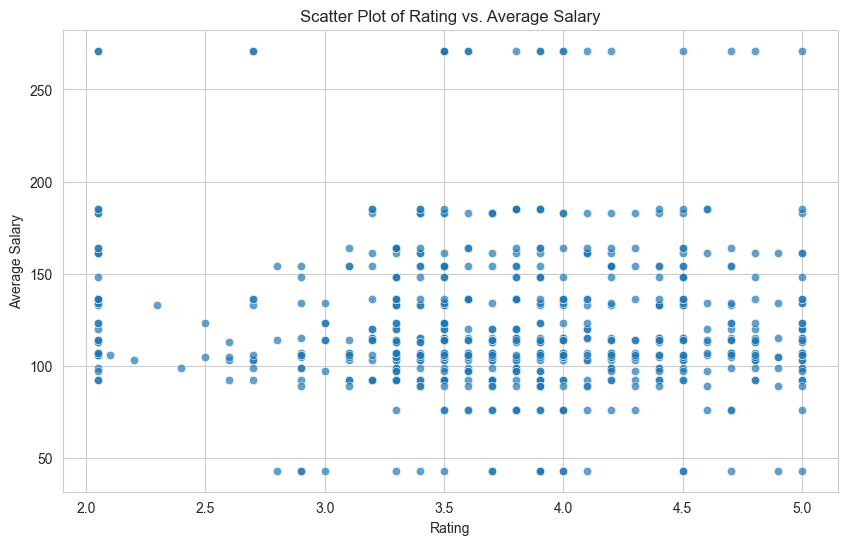

In [1627]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your data is in a DataFrame called 'df'
# Extract relevant columns for the scatter plot
scatter_data = df[['Rating', 'Average Salary']]

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Rating', y='Average Salary', data=scatter_data, alpha=0.7)
plt.title('Scatter Plot of Rating vs. Average Salary')
plt.xlabel('Rating')
plt.ylabel('Average Salary')
plt.grid(True)
plt.show()

**There is no Correlation between Ratin and the Average Salary since the Correlation Coefficient is equal -0.052344327589061566**

df.head()

In [1628]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Ownership,...,Education Level,Experience Level,python,excel,hadoop,spark,aws,tableau,big_data,State
0,Sr Data Scientist,137-171,Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst,"New York, NY","New York, NY",1001 - 5000,1993,Nonprofit,...,Bachelor,Senior,0,0,0,0,1,0,0,NY
1,Data Scientist,137-171,"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech,"Chantilly, VA","Herndon, VA",5001 - 10000,1968,Public,...,Bachelor,Mid-Senior,0,0,1,0,0,0,1,VA
2,Data Scientist,137-171,Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group,"Boston, MA","Boston, MA",1001 - 5000,1981,Private,...,Phd,Senior,1,1,0,0,1,0,0,MA
3,Data Scientist,137-171,JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON,"Newton, MA","Bad Ragaz, Switzerland",501 - 1000,2000,Public,...,Bachelor,Mid-Senior,1,1,0,0,1,0,0,MA
4,Data Scientist,137-171,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 - 200,1998,Private,...,Advanced degree,Senior,1,1,0,0,0,0,0,NY


In [1629]:
df['Min Employees'].value_counts()
filtered_df = df[df['Min Employees']!='Unknown']
filtered_df = df[df['Max Employees']!='Unknown']
filtered_df = df[df['Size']!='Unknown']


filtered_df.head()



,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Ownership,...,Education Level,Experience Level,python,excel,hadoop,spark,aws,tableau,big_data,State
0,Sr Data Scientist,137-171,Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst,"New York, NY","New York, NY",1001 - 5000,1993,Nonprofit,...,Bachelor,Senior,0,0,0,0,1,0,0,NY
1,Data Scientist,137-171,"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech,"Chantilly, VA","Herndon, VA",5001 - 10000,1968,Public,...,Bachelor,Mid-Senior,0,0,1,0,0,0,1,VA
2,Data Scientist,137-171,Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group,"Boston, MA","Boston, MA",1001 - 5000,1981,Private,...,Phd,Senior,1,1,0,0,1,0,0,MA
3,Data Scientist,137-171,JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON,"Newton, MA","Bad Ragaz, Switzerland",501 - 1000,2000,Public,...,Bachelor,Mid-Senior,1,1,0,0,1,0,0,MA
4,Data Scientist,137-171,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 - 200,1998,Private,...,Advanced degree,Senior,1,1,0,0,0,0,0,NY


In [1630]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 648 entries, 0 to 671
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Job Title         648 non-null    object  
 1   Salary Estimate   648 non-null    object  
 2   Job Description   648 non-null    object  
 3   Rating            648 non-null    float64 
 4   Company Name      648 non-null    object  
 5   Location          648 non-null    object  
 6   Headquarters      628 non-null    object  
 7   Size              648 non-null    object  
 8   Founded           648 non-null    int64   
 9   Ownership         628 non-null    object  
 10  Industry          588 non-null    object  
 11  Sector            588 non-null    object  
 12  Revenue           632 non-null    object  
 13  Minimum Salary    648 non-null    int64   
 14  Maximum Salary    648 non-null    int64   
 15  Average Salary    648 non-null    int64   
 16  salary_category   648 non-null 

How does
the average salary vary across different regions (Locations) and industries (Sectors), are they correlated?
Analysis of skills required and how they contribute to the Salary Estimated and the seniority level?

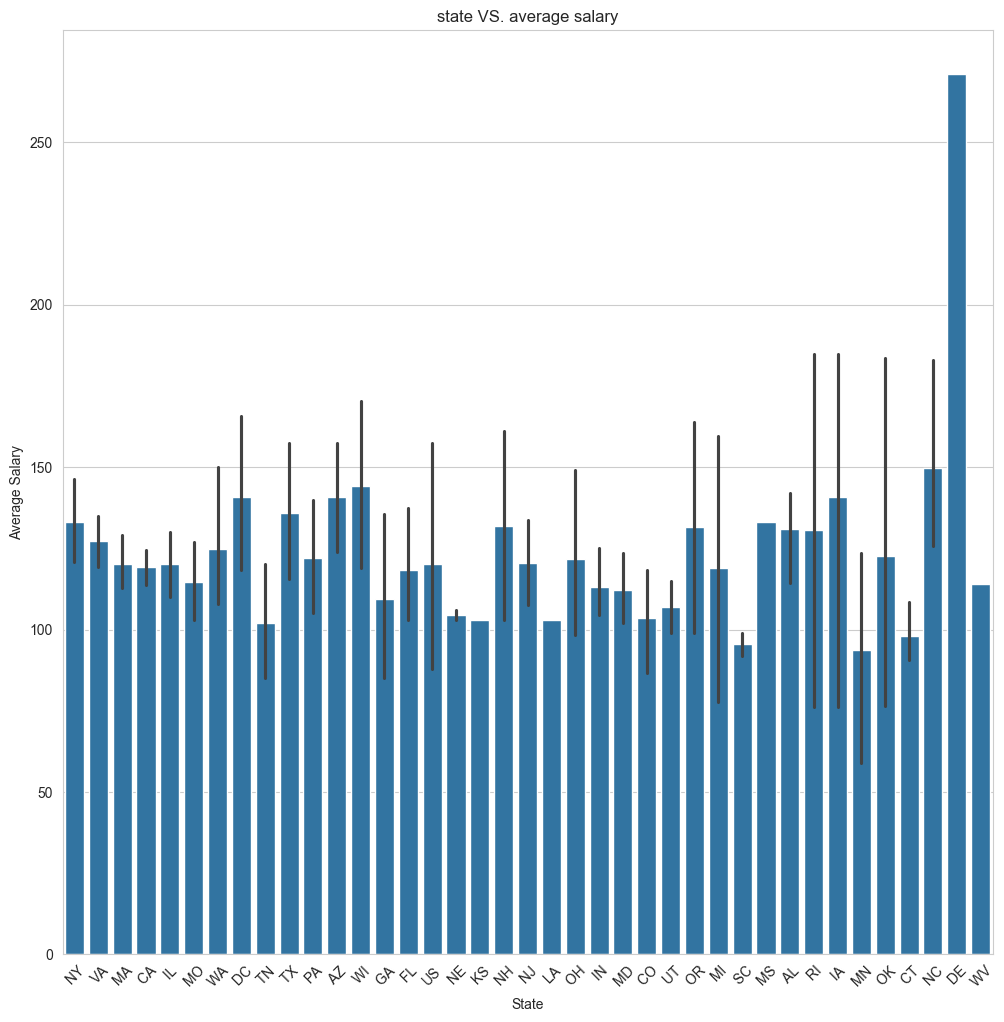

In [1631]:
plt.figure(figsize=(12,12))
sns.barplot(x = "State", y = "Average Salary", data = filtered_df)
plt.xticks(rotation=45);
plt.title("state VS. average salary")
plt.show()

salary vary across different sectors

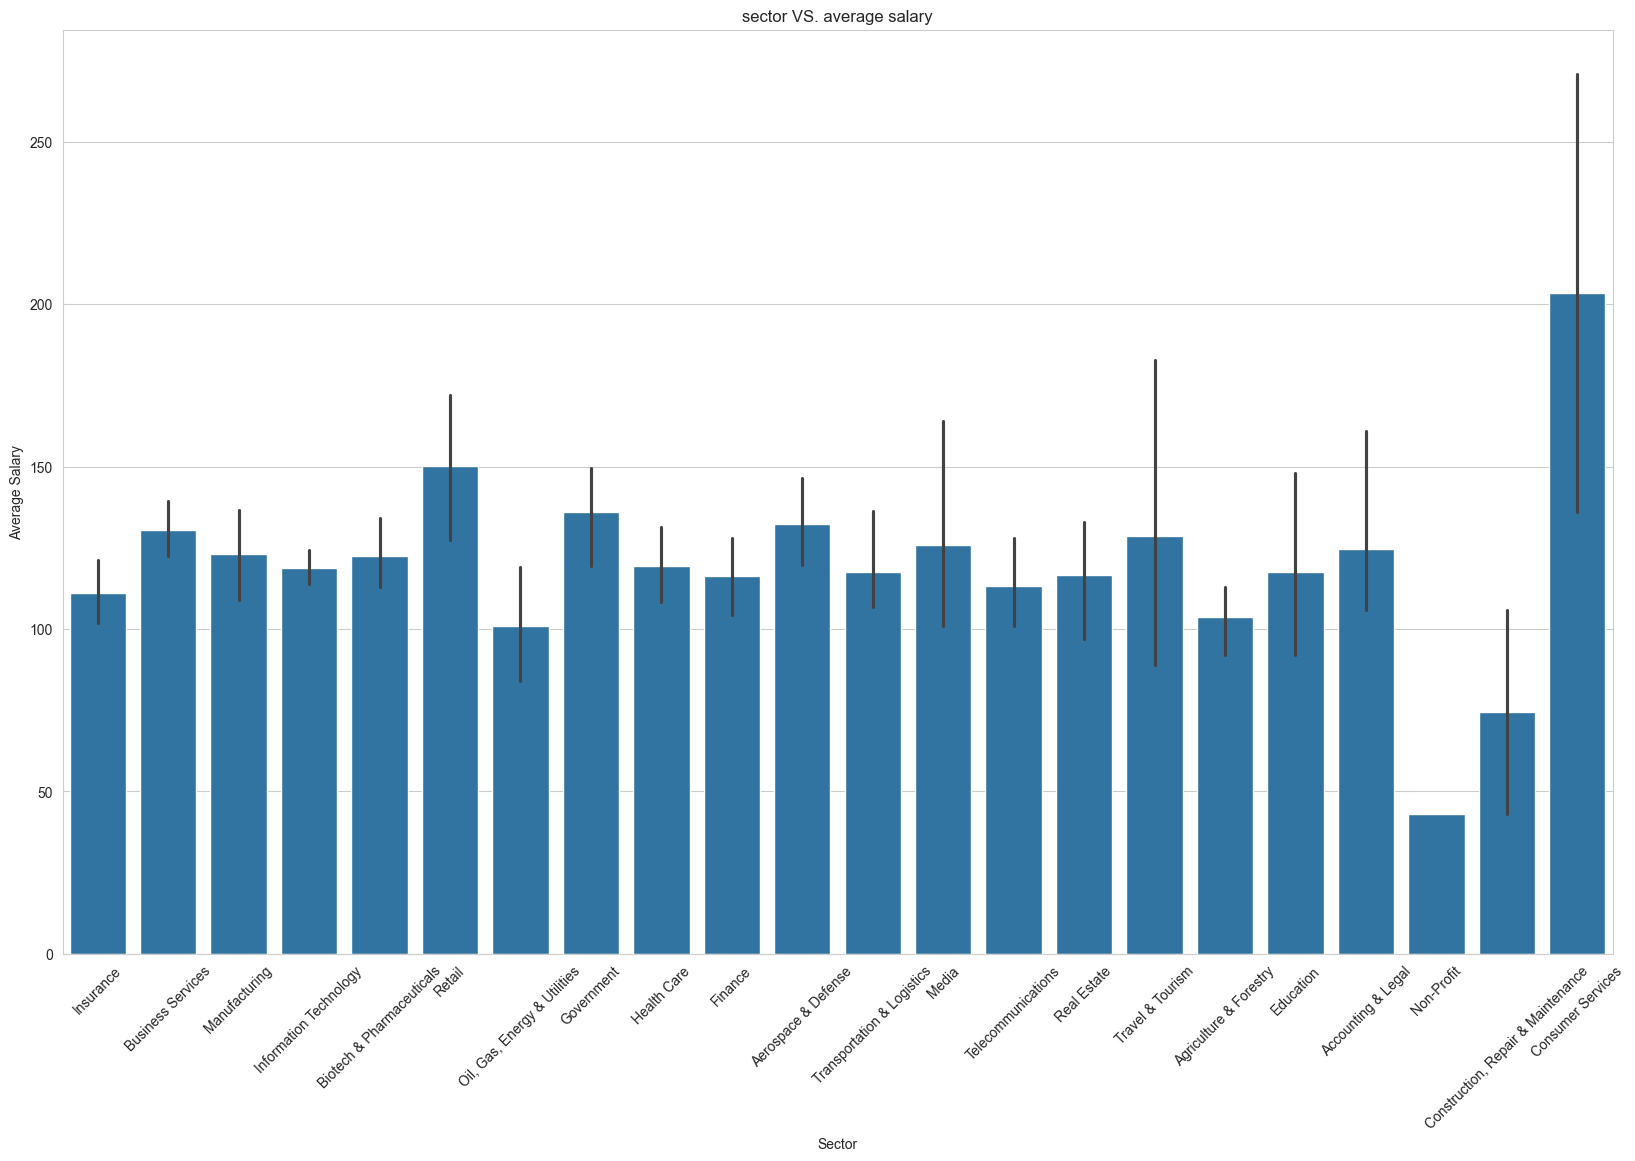

In [1632]:
plt.figure(figsize=(20,12))
sns.barplot(x = "Sector", y = "Average Salary", data = filtered_df)
plt.xticks(rotation=45);
plt.title("sector VS. average salary")
plt.show()

Does Private companies offer higher salaries to retain employees ?

           min  max        mean
Ownership                      
Nonprofit   43  271  127.425000
Other       89  148  120.888889
Private     43  271  119.698529
Public      43  271  129.942308


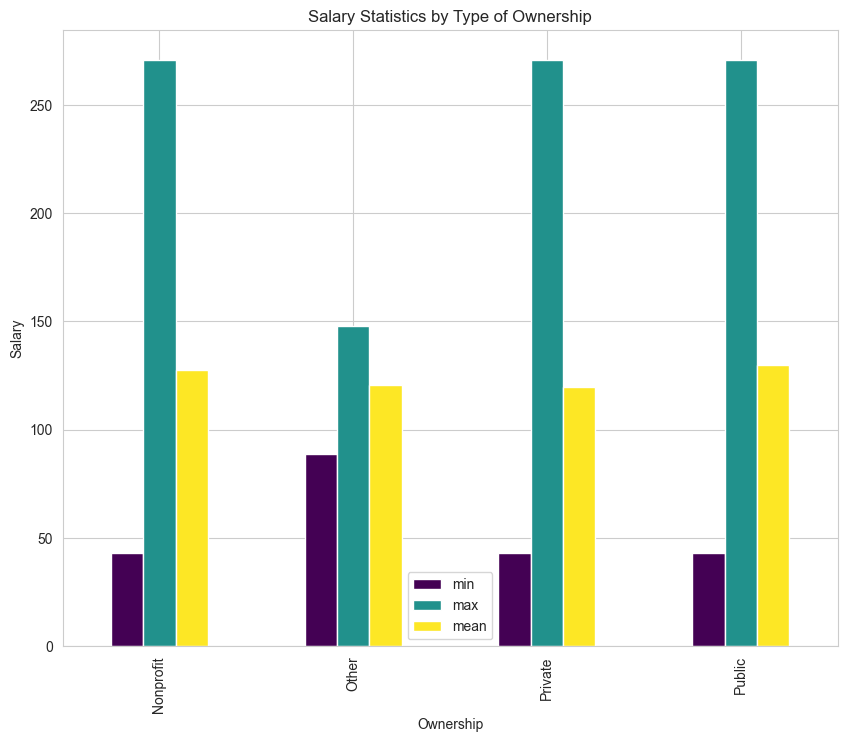

In [1633]:
salary_stats = filtered_df.groupby("Ownership")["Average Salary"].agg(["min", "max", "mean"])
print(salary_stats)
plt.figure(figsize=(10, 8))
salary_stats.plot.bar(ax=plt.gca(), colormap="viridis")

# Adding labels and title
plt.xlabel('Ownership')
plt.ylabel('Salary')
plt.title('Salary Statistics by Type of Ownership')

# Display the plot
plt.show()

Skills vs Experience level

In [1638]:
filtered_df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Ownership', 'Industry', 'Sector', 'Revenue', 'Minimum Salary',
       'Maximum Salary', 'Average Salary', 'salary_category',
       'Rating Interval', 'Min Employees', 'Max Employees', 'Education Level',
       'Experience Level', 'python', 'excel', 'hadoop', 'spark', 'aws',
       'tableau', 'big_data', 'State'],
      dtype='object')

In [1639]:
filtered_df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Ownership,...,Education Level,Experience Level,python,excel,hadoop,spark,aws,tableau,big_data,State
0,Sr Data Scientist,137-171,Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst,"New York, NY","New York, NY",1001 - 5000,1993,Nonprofit,...,Bachelor,Senior,0,0,0,0,1,0,0,NY
1,Data Scientist,137-171,"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech,"Chantilly, VA","Herndon, VA",5001 - 10000,1968,Public,...,Bachelor,Mid-Senior,0,0,1,0,0,0,1,VA
2,Data Scientist,137-171,Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group,"Boston, MA","Boston, MA",1001 - 5000,1981,Private,...,Phd,Senior,1,1,0,0,1,0,0,MA
3,Data Scientist,137-171,JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON,"Newton, MA","Bad Ragaz, Switzerland",501 - 1000,2000,Public,...,Bachelor,Mid-Senior,1,1,0,0,1,0,0,MA
4,Data Scientist,137-171,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 - 200,1998,Private,...,Advanced degree,Senior,1,1,0,0,0,0,0,NY


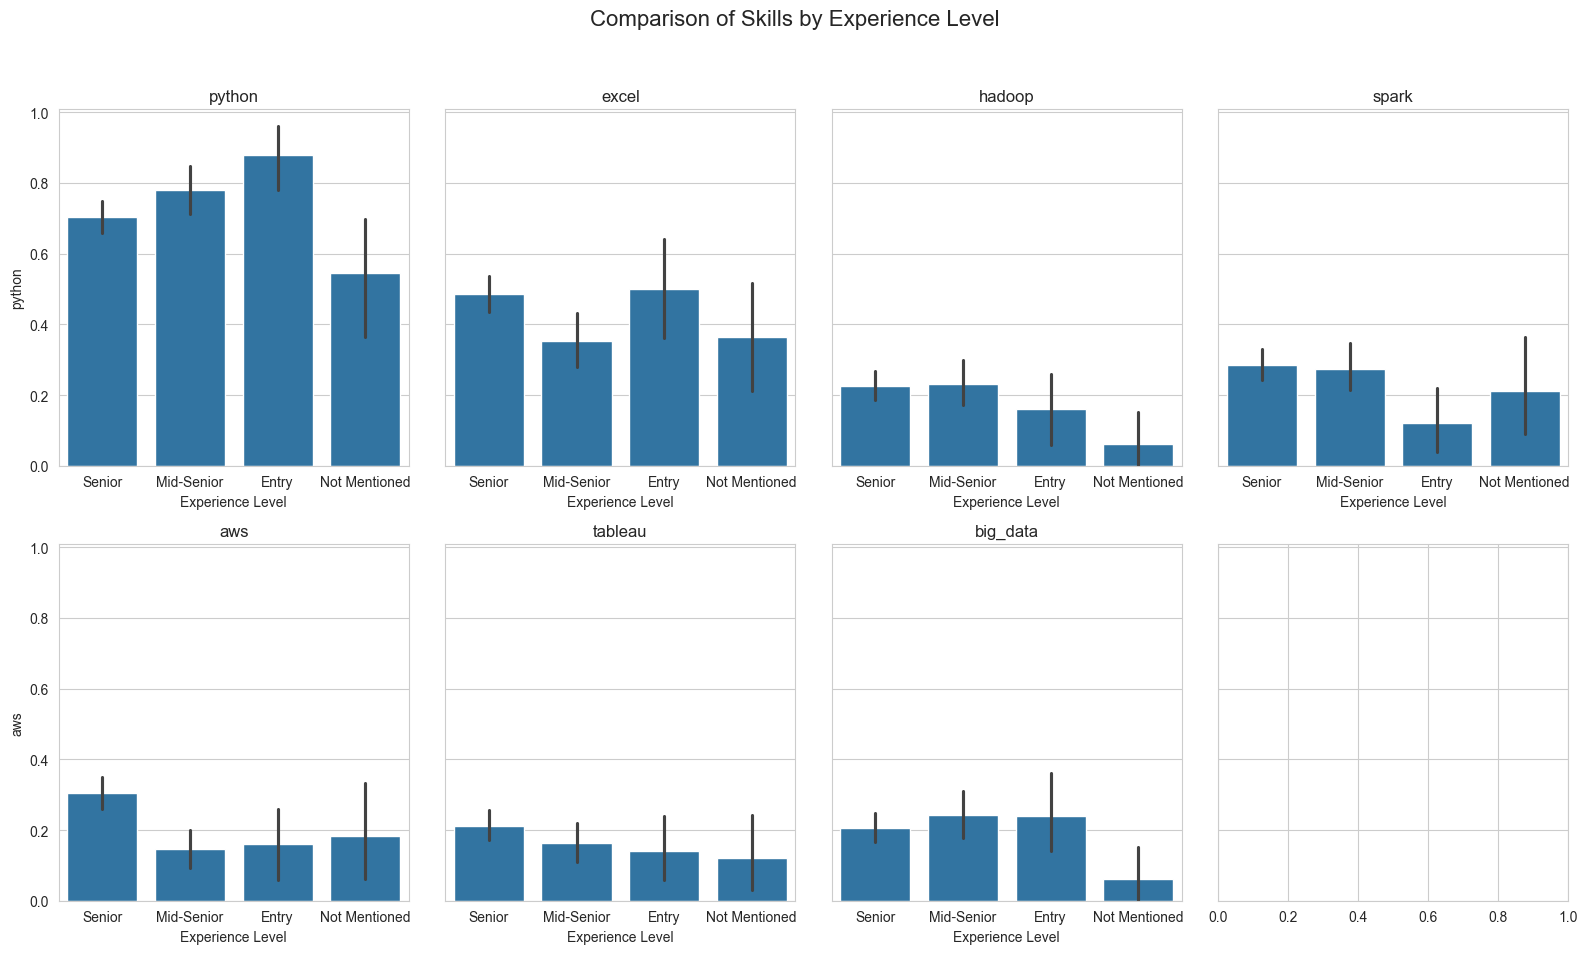

In [1640]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'

# Specify the skills and their corresponding columns
skills = ['python', 'excel', 'hadoop', 'spark', 'aws',
       'tableau', 'big_data']

# Set up the figure and axes for subplots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 10), sharey=True)
fig.suptitle('Comparison of Skills by Experience Level', fontsize=16)

# Flatten the 2D axes array to simplify iteration
axes = axes.flatten()

# Iterate over each skill and create a bar plot for each
for i, skill in enumerate(skills):
    sns.barplot(x='Experience Level', y=skill, data=filtered_df, ax=axes[i])
    axes[i].set_title(skill)
    axes[i].set_xlabel('Experience Level')
    axes[i].set_ylabel(skill)

# Adjust layout and show the plot
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
